# Task 3

Do a 3-layer PCA over an image having RGB as layers each color should be a layer.

## Configuration and set up

In [24]:
!pip install numpy pillow requests scikit-learn

In [45]:
import os
import re
import csv
import time
from os.path import join, dirname, abspath

from math import cos, sin, pi
from numpy.random import randint
from random import randint, uniform
from numpy import dot, zeros, array, ndarray, uint8

from warnings import warn
from typing import List, Tuple

import requests
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.decomposition import PCA, IncrementalPCA

#### Ignore this

##### Global config

In [82]:
config = {
  "image_size": 1200,
  "image_dir": "img_data",
  "save_image_dir": "img_data",
  "web_site": "https://picsum.photos",
  "verbose": 0
}


##### File manager

In [70]:
def extract_file_name_data(
    file_name: str,
    prefix: str,
    suffix: str
) -> str | None:
    """
    Extracts an identifier given a file name based on a given prefix and suffix

    Args:
        file_name (str): The input file name containing the model name
        prefix (str): The prefix before the model name in the file name
        suffix (str): The suffix after the model name in the file name

    Returns:
        str or None: The extracted model name or None if not found
    """
    pattern = rf"{re.escape(prefix)}([a-zA-Z0-9]+){re.escape(suffix)}"
    match = re.search(pattern, file_name)

    if match:
        return match.group(1)
    else:
        return None


def get_current_path(
    path: str
) -> str:
    """
    Gives the current absolute path

    Args:
        path (str): Path to add into root path

    Returns:
        dir_path (str): Absolute directory path
    """
    current_dir = os.getcwd() 
    dir_path = os.path.join(current_dir, path)

    return dir_path


def file_exists(
    file_path: str
) -> bool:
    """
    Check if a file exists

    Args:
        file_path (str): The path to the file

    Returns:
        bool: True if the file exists, False otherwise
    """
    return os.path.exists(file_path)


def list_files(
    path: str,
    extension: str
) -> List:
    """
    List files with a specific extension in a directory

    Args:
        path (str): The path to the directory containing the files
        extension (str): The file extension to filter files. Only files with
        this extension will be included in the list

    Returns:
        files (list): A list of file names in the specified directory
        (`path`) that have the specified file extension (`extension`)
    """
    files = [f for f in os.listdir(path) if f.endswith(extension)]

    return files


def check_path(
    path: str
) -> bool:
    """
    Checks if a path exist

    Args:
        path (str): Path to check

    Returns:
        True is exist, False if not
    """
    return os.path.isdir(path)


def create_path(
    path: str,
    filename: str
) -> str:
    """
    Creates an absolute path for a file

    Args:
        path (str): A directory path to host the file
        filename (str): A full file name extension included

    Returns:
        file_path (str): A file path to host a file
    """
    absolute_path = get_current_path(path)
    file_path = os.path.join(absolute_path, filename)

    return file_path


def create_dir(
    path: str
) -> None:
    """
    Creates a given path checking is exists of not

    Args:
        path (str): Path to create
    """
    try:
        if check_path(path):
            return
        else:
            dir_path = get_current_path(path)
            os.mkdir(dir_path)

        if config["verbose"]:
            print(f"Directory {path} created")
    except OSError as error_data:
        raise ValueError(f"[ERROR]: Creating {path} \n{error_data}")


def clear_dir(
    path: str
) -> None:
    """
    Delete all files inside a given directory

    Args:
        path (str): Path to directory to clear
    """
    try:
        path = get_current_path(path)
        files = os.listdir(path)
        for file in files:
            file_path = os.path.join(path, file)
            if os.path.isfile(file_path):
                os.remove(file_path)

        if config["verbose"]:
            print(f"Files from {path} deleted successfully.")
    except OSError:
        warn(
            f"[WARNING]: Deleting files at {path}",
            RuntimeWarning,
            stacklevel=1
        )

##### Random pictures

In [71]:
def create_random(
    size: List[int],
    file_name: str,
    file_extention: str = "jpg"
) -> None:
    """
    Create a file from config given a size and its file name

    Args:
        size (list[int]): List of integers
        file_name (str): File name
        file_extention (str): File extention
    """
    if (len(size) == 1):
        image = f'{config["web_site"]}/{size[0]}'
    else:
        image = f'{config["web_site"]}/{size[0]}/{size[1]}'

    response = requests.get(image)

    if not check_path(config["image_dir"]):
        create_dir(config["image_dir"])

    file_path = create_path(
        config["image_dir"], f"{file_name}.{file_extention}")

    if response.status_code == 200:
        with open(f"{file_path}", "wb") as f:
            f.write(response.content)
        if (config["verbose"]):
            print(f"Image donwloaded at {file_path}")
    else:
        print(f"[ERROR] donwloading image {response.status_code}")


def load_image(
    file_name: str = ""
) -> Image.Image:
    """
    Loads file_name or a random file from config

    Args:
        file_extention (str): Specific image to load

    Returns:
        Image from pillow

    Note:
        Default is random
    """
    try:
        path = get_current_path(config['image_dir'])
        files = os.listdir(path)

        if file_name != "":
            idx = files.index(file_name)
        else:
            idx = randint(0, len(files) - 1)

        file_path = os.path.join(path, files[idx])
        if os.path.isfile(file_path):
            image = Image.open(f"{file_path}")

            return image
    except OSError:
        print(
            f"[ERROR]: Something went wrong while getting image {file_name} or index not found")


def save_image(
    image: Image.Image,
    file_name: str,
    file_extention: str = "PNG"
) -> None:
    """
    Saves a pillow kind image

    Args:
        image (Image): A pillow image
        file_name (str): A specific file name
        file_extention (str): The specific image file extention (Default is jpg)
    """
    try:
        path = get_current_path(config['save_image_dir'])

        if not check_path(f"{config['save_image_dir']}"):
            create_dir(config["save_image_dir"])

        image.save(f"{path}/{file_name}.{file_extention}", f"{file_extention}")
    except OSError:
        print(
            f"[ERROR]: Something went wrong while saving the file {file_name}")

## Implementation

#### PCA decomposition

In [79]:
def load_image(image_path):
    return imread(image_path)

def separate_channels(image):
    return image[:,:,0], image[:,:,1], image[:,:,2]

def apply_pca(channel, n_components):
    pca = IncrementalPCA(n_components=n_components)
    channel_transformed = pca.fit_transform(channel)
    channel_reconstructed = pca.inverse_transform(channel_transformed)
    return channel_reconstructed

def find_optimal_components(channel, variance_threshold=95):
    pca = PCA()
    pca.fit(channel)
    var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
    k = np.argmax(var_cumu > variance_threshold)
    return k

def reconstruct_image(image, k_R, k_G, k_B):
    R, G, B = separate_channels(image)
    R_reconstructed = apply_pca(R, k_R)
    G_reconstructed = apply_pca(G, k_G)
    B_reconstructed = apply_pca(B, k_B)
    return np.stack((R_reconstructed, G_reconstructed, B_reconstructed), axis=2)

def plot_image(image, title="Image", cmap=None):
    plt.figure(figsize=[12,8])
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')

def plot_explained_variance(var_cumu, k, title):
    plt.figure(figsize=[10,5])
    plt.plot(var_cumu)
    plt.axvline(x=k, color="k", linestyle="--")
    plt.axhline(y=95, color="r", linestyle="--")
    plt.title(title)
    plt.ylabel('Cumulative Explained variance (%)')
    plt.xlabel('Principal components')
    plt.show()

def plot_reconstructed_images(image, ks):
    plt.figure(figsize=[15,9])
    for i, k in enumerate(ks):
        reconstructed_image = reconstruct_image(image, k, k, k)
        plt.subplot(2, 3, i+1)
        plt.imshow(reconstructed_image.astype(np.uint8))
        plt.title(f"Components: {k}")
        plt.axis('off')
    plt.subplots_adjust(wspace=0.2, hspace=0.0)
    plt.show()


#### Main Execution

In [85]:
clear_dir(config["save_image_dir"])
create_random([config['image_size']], f"image-{str(config['image_size'])}")

Number of components explaining 95% variance for R channel: 6
Number of components explaining 95% variance for G channel: 6
Number of components explaining 95% variance for B channel: 6


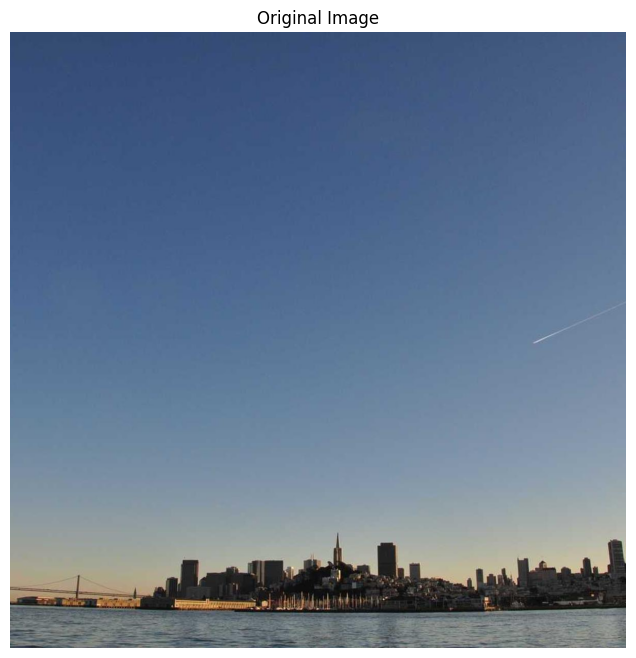

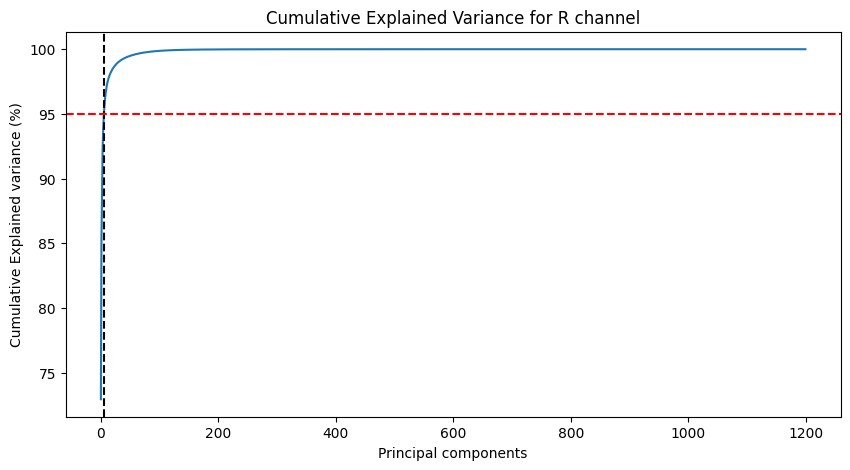

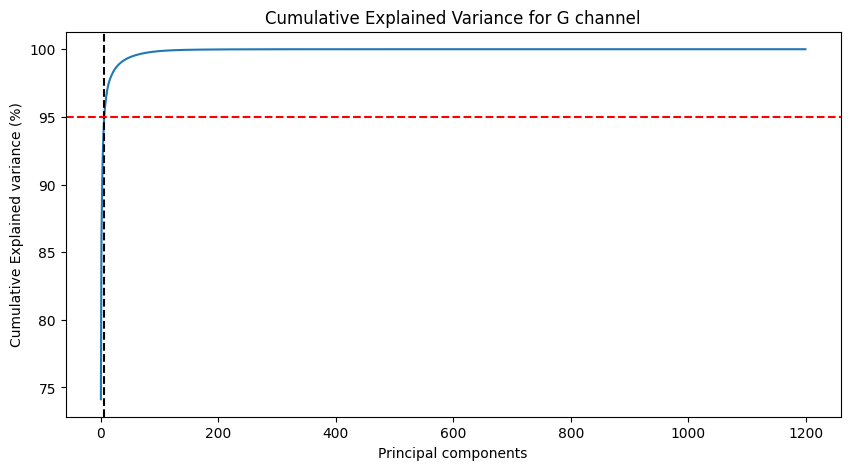

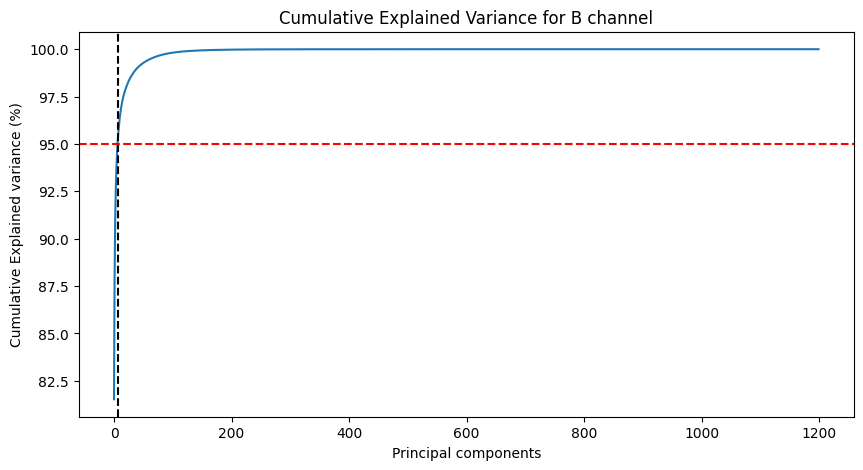

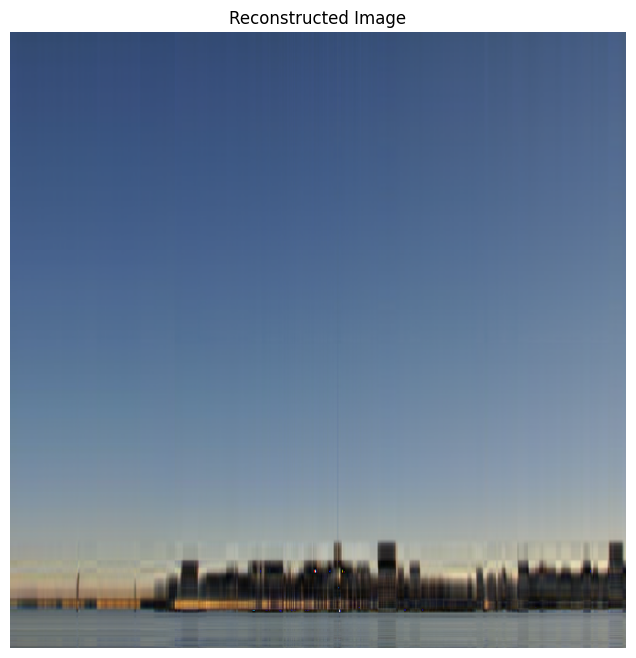

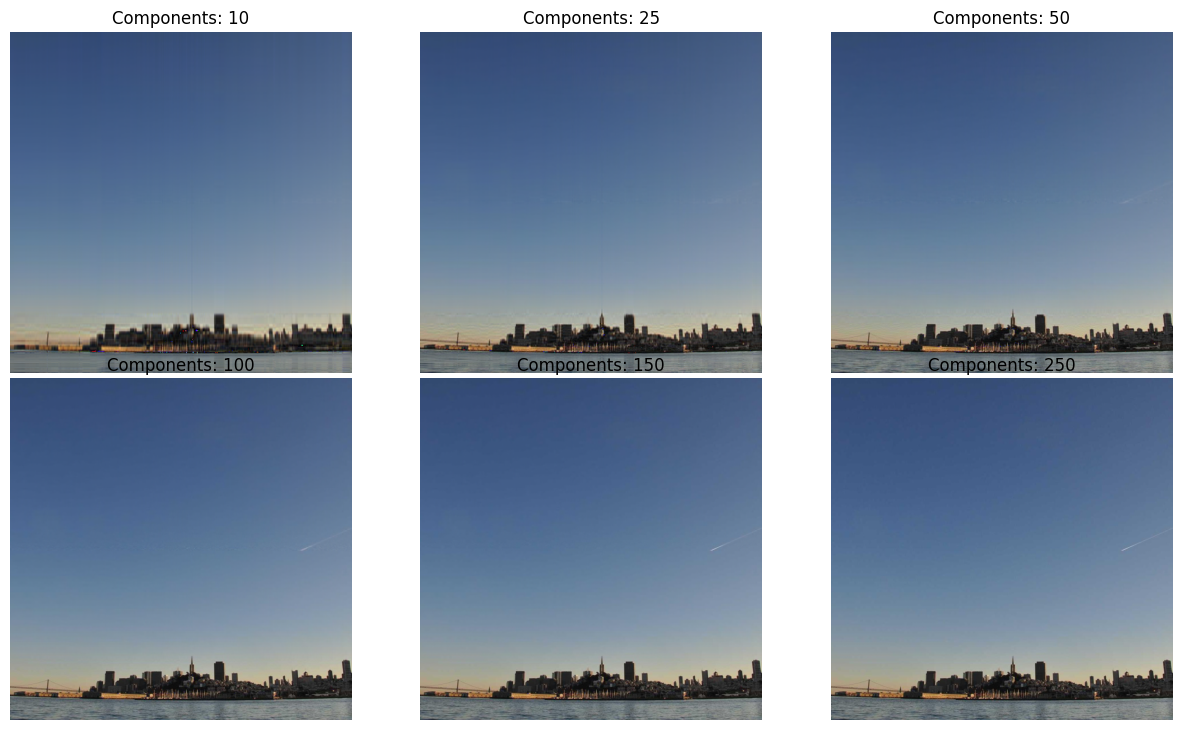

In [86]:
image_path = f"{str(config['image_dir'])}/image-{str(config['image_size'])}.jpg"
image = load_image(image_path)
plot_image(image, title="Original Image")

R, G, B = separate_channels(image)

k_R = find_optimal_components(R)
k_G = find_optimal_components(G)
k_B = find_optimal_components(B)

print(f"Number of components explaining 95% variance for R channel: {k_R}")
print(f"Number of components explaining 95% variance for G channel: {k_G}")
print(f"Number of components explaining 95% variance for B channel: {k_B}")

R_var_cumu = np.cumsum(PCA().fit(R).explained_variance_ratio_)*100
G_var_cumu = np.cumsum(PCA().fit(G).explained_variance_ratio_)*100
B_var_cumu = np.cumsum(PCA().fit(B).explained_variance_ratio_)*100

plot_explained_variance(R_var_cumu, k_R, "Cumulative Explained Variance for R channel")
plot_explained_variance(G_var_cumu, k_G, "Cumulative Explained Variance for G channel")
plot_explained_variance(B_var_cumu, k_B, "Cumulative Explained Variance for B channel")

reconstructed_image = reconstruct_image(image, k_R, k_G, k_B)
plot_image(reconstructed_image.astype(np.uint8), title="Reconstructed Image")

ks = [10, 25, 50, 100, 150, 250]
plot_reconstructed_images(image, ks)